In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#### Exercise

Choose one of the examples on feedback loop (can be either negative or positive) and simulate it. Try to combine two feedback loops (or simulating the genetic network shown in class or creating one yourself), simulate it and describe in few sentences the results of the simulations (like "what's going on" in the simulation).


### Positive feedback loop
The "genetic switch" (a loop consisting of two repressors) is described by this system of equations:
$$
\begin{equation}
    \begin{cases}
      \frac{dR}{dt} = \frac{\gamma_1}{1 + \left(\frac{L}{k_L}\right)^{h_L}} + l_1 - \frac{R}{\tau_R}\\
      \frac{dL}{dt} = \frac{\gamma_2}{1 + \left(\frac{R}{k_R}\right)^{h_R}} + l_2 - \frac{L}{\tau_L}\\
    \end{cases}
\end{equation}
$$

In [2]:
def positive_feedback(var, t, l1, l2, g1, g2, h_R, h_L, k_R, k_L, tau_R, tau_L):
    # var = [R, L]
    
    R = var[0]
    L = var[1]
    
    dR_dt = g1/(1 + (L/k_L)**h_L) + l1 - R/tau_R
    dL_dt = g2/(1 + (R/k_R)**h_R) + l2 - L/tau_L
    
    return [dR_dt, dL_dt]

In [3]:
def plot_RL(R, L, title, color1, color2):
    
    plt.plot(t, R, color1, label='R(t)')
    plt.plot(t, L, color2, label='L(t)')
    plt.ylabel('R/L')
    plt.xlabel('time')
    plt.title(title)
    plt.legend(loc='best')

I will simulate the dynamics for the case, when the system is stable (it has two stable solutions):

$$
k_L= k_R = 1, h_L > 1, h_R > 1
$$

In [4]:
l1 = 0.5
l2 = 0.5
g1 = 2
g2 = 3
h_R = 1.5
h_L = 1.5
k_R = 1
k_L = 1
tau_R = 3
tau_L = 3


var_0 = [10, 12] #initial condition
t = np.linspace(0, 100, 100)

var = odeint(positive_feedback, var_0, t, args = (l1, l2, g1, g2, h_R, h_L, k_R, k_L, tau_R, tau_L))

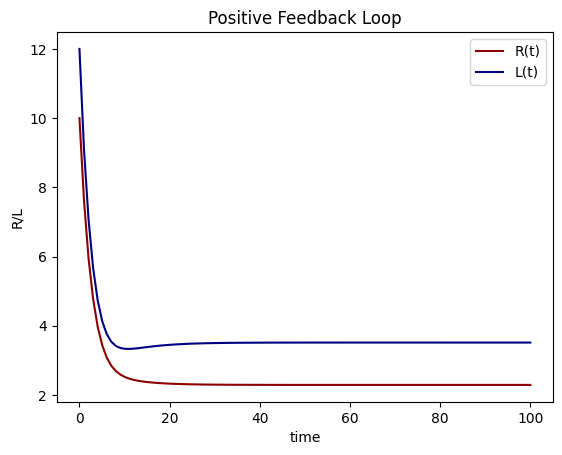

In [5]:
R = var[:,0]
L = var[:,1]

plot_RL(R, L, 'Positive Feedback Loop', 'darkred', 'navy')

### Combining two feedback loops

(from the "Models of life: Dynamics and Regulation in Biological Systems.")

S: small molecule

R: transcriptional regulator

T: transport proteins

E: enzyme

A common “feedback motif”: a transcriptional regulator (R) senses the intracellular concentration of a particular small molecule (s) and regulates transcription of the transport proteins (T) using one FL, facilitating the influx of S. With a second loop, R controls transcription of the enzyme (E) responsible for the metabolic conversion of s.

Genetic network:
$$
\begin{equation}
    \begin{cases}
    \frac{dS}{dt} = \sigma T - \gamma E S - S\\
      \frac{dT}{dt} =  l + \frac{1}{1 + \left(\frac{R_s}{k_T}\right)^{h}} - T \\
      \frac{dE}{dt} = l + \frac{1}{1 + \left(\frac{R_s}{k_E}\right)^{h}} - E \\
      R_s = R_{tot} \frac{S}{1+S}
    \end{cases}
\end{equation}
$$

$\sigma$ is the extracellular concentration of the small molecule, and $\gamma$ is the metabolic rate in units of the dilution rate due to cell growth.

In [6]:
def genetic_network(var, t, sigma, gamma, l, h, k_T, k_E, R_tot):
    # var = [S, T, E, R_s]
    
    S = var[0]
    T = var[1]
    E = var[2]
    R_s = R_tot*S/(S+1)
     
    dS_dt = sigma*T - gamma*E*S - S
    dT_dt = l + 1/(1 + (R_s/k_T)**h) - T
    dE_dt = l + 1/(1 + (R_s/k_E)**h) - E
    
    return [dS_dt, dT_dt, dE_dt]

In [7]:
def plot_gnetwork(S, T, E, title, color1, color2, color3):
    
    plt.plot(t, S, color1, label='S(t)')
    plt.plot(t, T, color2, label='T(t)')
    plt.plot(t, E, color3, label='E(t)')
    plt.ylabel('dynamics')
    plt.xlabel('time')
    plt.title(title)
    plt.ylim(0, 250)
    plt.xlim(0, 10)
    plt.legend(loc='best')

I explore the system for low and high sigma (extracellular concentration of the small molecule).

In [8]:
sigma = 1.5
l = 10
h = 1.5
k_T = 10
k_E = 5
R_tot = 100
gamma = 0.1

var_02 = [170, 150, 200] #initial condition
t = np.linspace(0, 10, 100)

var2 = odeint(genetic_network, var_02, t, args = (sigma, gamma, l, h, k_T, k_E, R_tot))

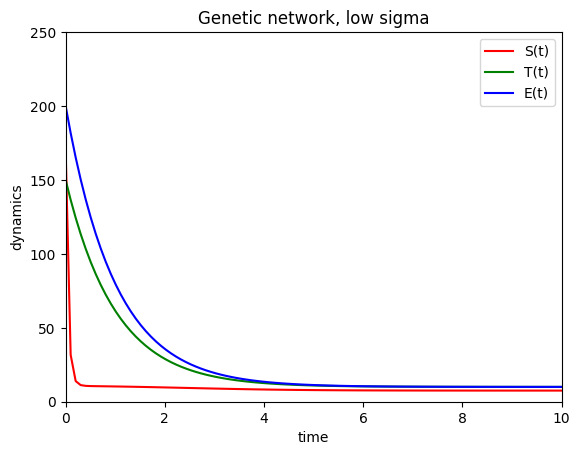

In [9]:
S = var2[:,0]
T = var2[:,1]
E = var2[:,2]

plot_gnetwork(S, T, E, 'Genetic network, low sigma', 'red', 'green', 'blue')

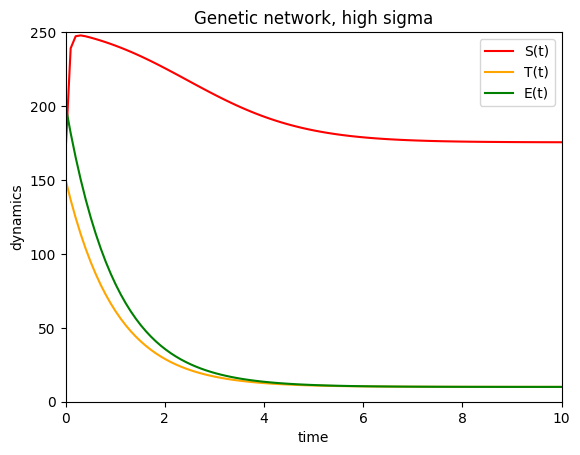

In [10]:
sigma = 35
t = np.linspace(0, 10, 100)
var3 = odeint(genetic_network, var_02, t, args = (sigma, gamma, l, h, k_T, k_E, R_tot))

S1 = var3[:,0]
T1 = var3[:,1]
E1 = var3[:,2]

plot_gnetwork(S1, T1, E1, 'Genetic network, high sigma', 'red', 'orange', 'green')

At low extracellular concentration (sigma) the small molecule is just being used up reaching plateau in the end, while for higher sigma we can see firstly the increase of S due to activated transportation (the higher the sigma, the higher will be the peak). Moreover, the value of the plateau with higher sigma is bigger than for the lower one. In both cases transport proteins and enzymes are being used up reaching the plateau.